In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file
df_pre = pd.read_csv("./GermanCredit.csv")
print (df_pre.shape)
print (df_pre.columns)
df_pre.head(5)

(1000, 21)
Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [3]:
# Randomly select 50% data for this use case
from sklearn.model_selection import train_test_split
out_data,df =train_test_split(df_pre, train_size = 0.5,random_state=5)
print (df.shape)
print (df.columns)
df.head(5)

(500, 21)
Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
544,no checking account,12,critical account/other credits existing,car (new),1255,... < 100 DM,... >= 7 years,4,male : single,none,...,real estate,61,none,own,2,unskilled - resident,1,no,yes,1
515,... < 100 DM,6,critical account/other credits existing,car (new),609,... < 100 DM,4 <= ... < 7 years,4,female : divorced/separated/married,none,...,building society savings agreement/life insurance,37,none,own,2,skilled employee/official,1,no,no,1
193,no checking account,6,existing credits paid back duly till now,domestic appliances,2108,... < 100 DM,4 <= ... < 7 years,2,male : married/widowed,none,...,real estate,29,none,rent,1,skilled employee/official,1,no,yes,1
11,... < 100 DM,48,existing credits paid back duly till now,others,4308,... < 100 DM,... < 1 year,3,female : divorced/separated/married,none,...,building society savings agreement/life insurance,24,none,rent,1,skilled employee/official,1,no,yes,0
279,no checking account,24,existing credits paid back duly till now,domestic appliances,1901,100 <= ... < 500 DM,1 <= ... < 4 years,4,male : single,none,...,car or other,29,none,rent,1,management/self-employed/highly qualified empl...,1,yes,yes,1


In [4]:
# Lets build a Ensemble model but need to modify the dataset first
obj_df=df.select_dtypes(include=['object'])
obj_df.head()

,status,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
544,no checking account,critical account/other credits existing,car (new),... < 100 DM,... >= 7 years,male : single,none,real estate,none,own,unskilled - resident,no,yes
515,... < 100 DM,critical account/other credits existing,car (new),... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,building society savings agreement/life insurance,none,own,skilled employee/official,no,no
193,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,4 <= ... < 7 years,male : married/widowed,none,real estate,none,rent,skilled employee/official,no,yes
11,... < 100 DM,existing credits paid back duly till now,others,... < 100 DM,... < 1 year,female : divorced/separated/married,none,building society savings agreement/life insurance,none,rent,skilled employee/official,no,yes
279,no checking account,existing credits paid back duly till now,domestic appliances,100 <= ... < 500 DM,1 <= ... < 4 years,male : single,none,car or other,none,rent,management/self-employed/highly qualified empl...,yes,yes


In [5]:
#create dummies encoding for categorical data
dff=pd.get_dummies(df, columns=['credit_history','purpose','savings','status','employment_duration',
       'personal_status_sex', 'other_debtors','property','other_installment_plans', 'housing','job','foreign_worker'])

In [6]:
dff.shape

(500, 61)

In [7]:
# Lets check for highly correlated variables
cor= dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

amount                                                   duration                                                   0.583234
credit_history_existing credits paid back duly till now  credit_history_critical account/other credits existing    -0.670328
savings_unknown/no savings account                       savings_... < 100 DM                                      -0.609828
personal_status_sex_male : single                        personal_status_sex_female : divorced/separated/married   -0.766802
other_debtors_none                                       other_debtors_co-applicant                                -0.678394
                                                         other_debtors_guarantor                                   -0.690725
other_installment_plans_none                             other_installment_plans_bank                              -0.838966
housing_for free                                         property_unknown/no property                               0.740247


In [8]:
#Drop irrelavent data
dff=dff.drop(["telephone","foreign_worker_yes","job_unskilled - resident","housing_rent","other_installment_plans_bank","other_debtors_co-applicant"],axis=1)

In [9]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['credit_risk']
X = dff.loc[:, dff.columns != 'credit_risk']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 54), (150, 54), (350,), (150,))

In [10]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

In [11]:
#Predict on test data set
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

In [12]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

In [13]:
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[12 42]
 [ 0 96]]
0.72


Text(0.5, 0, 'Relative Importance')

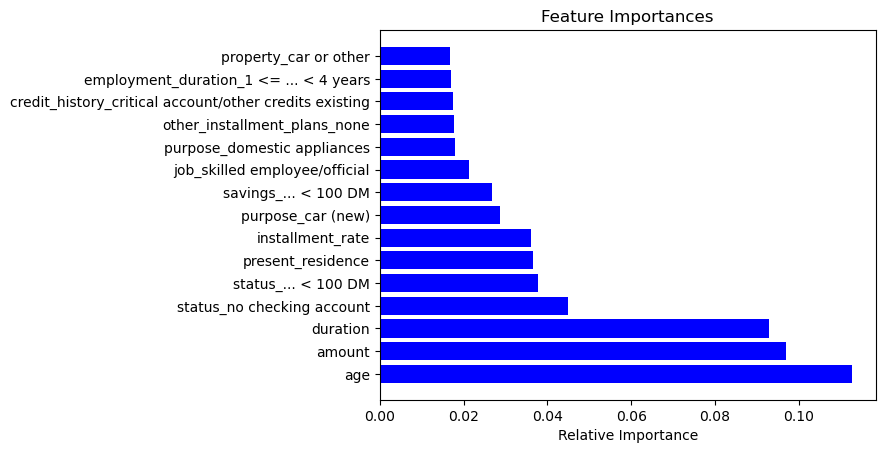

In [14]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dff.columns[:]
features= a.drop('credit_risk',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [15]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [16]:
"Train Accuracy:"
(trainResult*100.0)

100.0

In [17]:
"Test Accuracy:"
(testResult*100.0)

72.0

### K-fold cross-validation
* k-fold cross validation( without stratification)
* Usually k is set as 10-20 in practical settings, depends on data set size

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
#choose number of folds and set random seed
num_folds = 10
seed = 77

In [20]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

In [21]:
#check score for each fold
results = cross_val_score(rfm,X, y, cv=kfold)
results

array([0.7 , 0.84, 0.68, 0.7 , 0.78, 0.8 , 0.92, 0.76, 0.8 , 0.7 ])

In [22]:
np.mean(abs(results))

0.768

In [23]:
results.std()

0.07222188034107117

### Leave One Out Cross-Validation

In [24]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [25]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(rfm, X_train, y_train, cv=LeaveOneOut())
scores

array([0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

* Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [26]:
scores.mean()

0.78

In [27]:
scores.std()

0.4142463035441596

### Stratified cross-validation
* k-fold cross validation with stratification¶

In [28]:
k = 10

In [30]:
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55,shuffle=True)
results = cross_val_score(rfm, X, y, cv = stratified_kfold)

In [31]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.7819999999999999
Standard deviation:  0.046000000000000006


### Bootstrapping
* Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
* Create a model with each bootstrap sample and validate it with the test set
* Final result is calculated by averaging the accuracy of models

In [32]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [33]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [34]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6853333333333333
Standard deviation:  0.014236104336041732


* Stratified cross-validation is giving better result